# **MODELLING - MODUL 8 (TUGAS VERSI A/1)**

**Nama:** Mochammad Delvin Farhan Akbar  
**Dataset:** Auto MPG (auto-mpg-rfu.xlsx)  
**Tools:** Python, Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn  
**Link Notebook:** [Google Colab](https://colab.research.google.com/drive/1tHSzSlM3zL3v4vhDsdBI0UZgZJUF2iTr?usp=sharing)  
**Link Dataset:** Auto MPG (UCI Machine Learning Repository / versi refined)  

Pada tugas ini dilakukan penerapan **konsep dasar Machine Learning** menggunakan dataset *Auto MPG*.  
Analisis difokuskan pada pembuatan **model regresi** untuk memprediksi efisiensi bahan bakar (`mpg`) berdasarkan fitur-fitur kendaraan seperti `horsepower`, `weight`, dan `displacement`.  
Langkah-langkah meliputi **pre-processing data, eksplorasi (EDA), pembangunan model, dan evaluasi performa model** menggunakan metrik **R²** dan **RMSE**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **1. Pendahuluan & Pemahaman Dataset**

Dataset **Auto MPG** berisi informasi mengenai spesifikasi kendaraan dan tingkat efisiensi bahan bakar (diukur dalam *miles per gallon* atau `mpg`).  
Beberapa kolom utama antara lain:

- `cylinders`: jumlah silinder mesin  
- `displacement`: kapasitas mesin (cc)  
- `horsepower`: tenaga mesin  
- `weight`: berat kendaraan  
- `acceleration`: waktu percepatan 0–60 mph  
- `model_year`: tahun produksi  
- `origin` dan `country_origin`: asal negara kendaraan  
- `car_name`: nama kendaraan  

Tujuan dari analisis ini adalah **memprediksi nilai MPG (efisiensi bahan bakar)** berdasarkan fitur-fitur tersebut menggunakan model regresi.


In [6]:
df = pd.read_excel("auto-mpg-rfu.xlsx")

print("5 Baris Awal Dataset:")
display(df.head())

print("\nInfo Dataset:")
print(df.info())

print("\nDeskripsi Statistik:")
display(df.describe())

5 Baris Awal Dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,full_model_year,origin,country_origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1970,1,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1970,1,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1970,1,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1970,1,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1970,1,USA,ford torino



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mpg              398 non-null    float64
 1   cylinders        398 non-null    int64  
 2   displacement     398 non-null    float64
 3   horsepower       392 non-null    float64
 4   weight           398 non-null    int64  
 5   acceleration     398 non-null    float64
 6   model_year       398 non-null    int64  
 7   full_model_year  398 non-null    int64  
 8   origin           398 non-null    int64  
 9   country_origin   398 non-null    object 
 10  car_name         398 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 34.3+ KB
None

Deskripsi Statistik:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,full_model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1976.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1970.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1973.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1976.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1979.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1982.000000,3.000000


## **2. Data Preparation**

In [8]:
print("Jumlah Missing Value per Kolom:")
print(df.isnull().sum())

Jumlah Missing Value per Kolom:
mpg                0
cylinders          0
displacement       0
horsepower         6
weight             0
acceleration       0
model_year         0
full_model_year    0
origin             0
country_origin     0
car_name           0
dtype: int64


Tahapan pembersihan data dilakukan sebagai berikut:

1. **Pengecekan Missing Value**  
   Ditemukan 6 nilai hilang pada kolom `horsepower`. Nilai ini dapat diisi (imputasi) menggunakan median agar tidak mengganggu pelatihan model.

2. **Encoding Fitur Kategorikal**  
   Kolom `country_origin` dan `car_name` bertipe *object*, sehingga dilakukan **One-Hot Encoding** menggunakan `pd.get_dummies()` agar model dapat membaca data dalam bentuk numerik.

3. **Split Dataset**  
   Data dibagi menjadi 80% data latih dan 20% data uji menggunakan `train_test_split`.

## **3. Exploratory Data Analyst (EDA)**

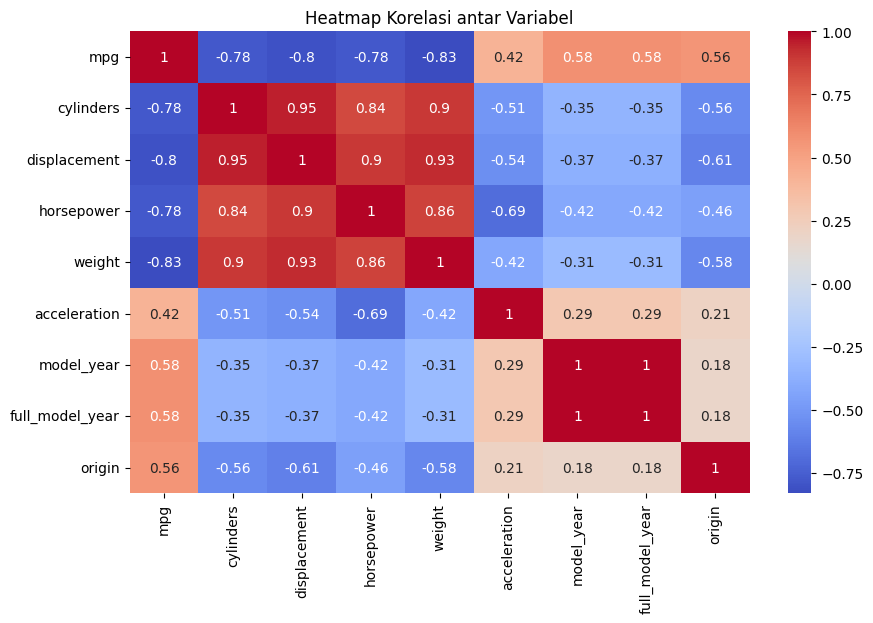

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(['country_origin', 'car_name'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Variabel")
plt.show()

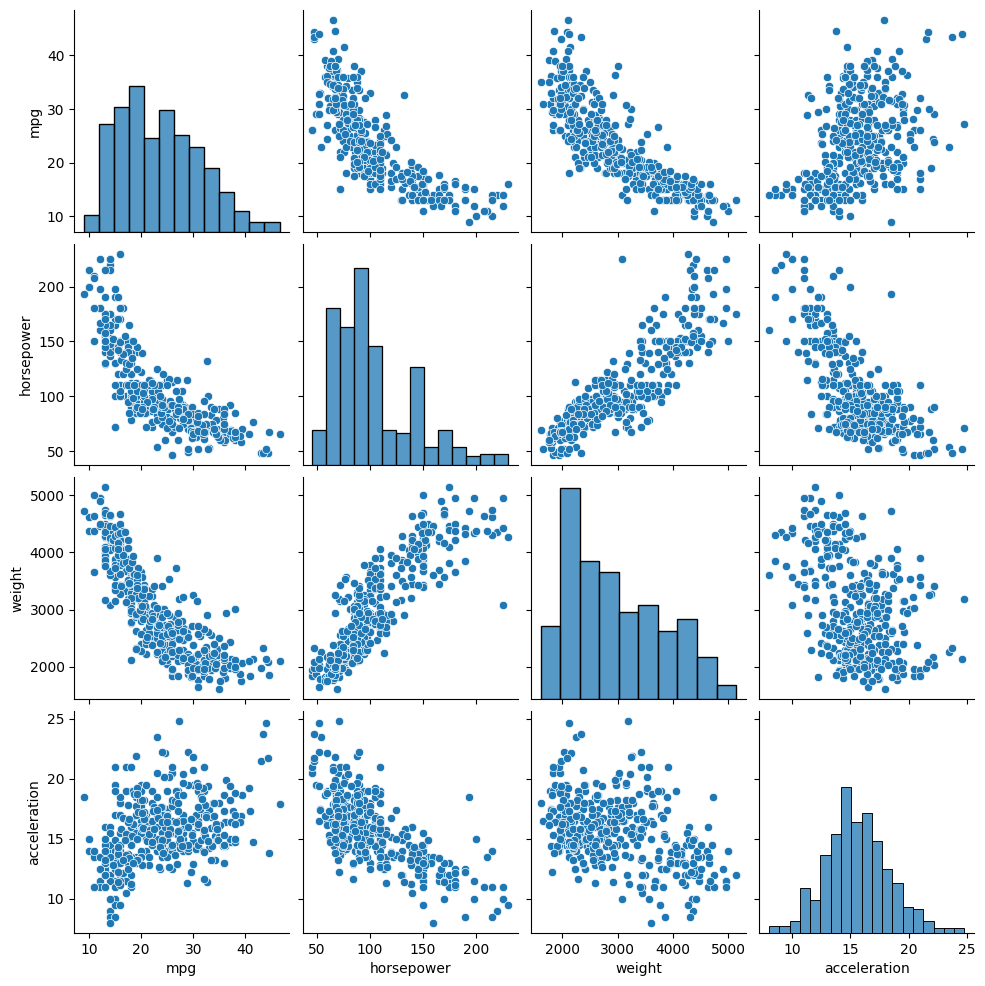

In [12]:
sns.pairplot(df[['mpg','horsepower','weight','acceleration']])
plt.show()

Tahap eksplorasi dilakukan untuk memahami hubungan antar variabel:

- **Heatmap Korelasi** menunjukkan bahwa fitur `weight` dan `horsepower` memiliki korelasi negatif kuat terhadap `mpg`.  
  Artinya, mobil yang lebih berat atau bertenaga besar cenderung memiliki konsumsi bahan bakar yang lebih boros.  
- **Pairplot** antara `mpg`, `horsepower`, `weight`, dan `acceleration` memperkuat temuan tersebut secara visual.  
- Fitur-fitur seperti `acceleration` dan `model_year` memiliki korelasi positif lemah terhadap `mpg`.

## **4. Pemodelan (Modeling)**

Tiga model regresi digunakan untuk membandingkan performa:

1. **Linear Regression** — model dasar dengan asumsi hubungan linier antar variabel.  
2. **Decision Tree Regressor** — mampu menangkap pola non-linier dan interaksi antar fitur.  
3. **Random Forest Regressor** — ensemble dari banyak pohon keputusan untuk meningkatkan akurasi dan stabilitas.


In [22]:
y = df['mpg']
X = df.drop('mpg', axis=1)

categorical_cols = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Model 3: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## **5. Evaluasi Model**

In [24]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.Series({'Model': model_name, 'RMSE': rmse, 'R2': r2})

results = pd.concat([
    evaluate(y_test, y_pred_lr, 'Linear Regression'),
    evaluate(y_test, y_pred_dt, 'Decision Tree'),
    evaluate(y_test, y_pred_rf, 'Random Forest')
], axis=1).T.reset_index(drop=True)

print("\nHasil Evaluasi Model:")
display(results)


Hasil Evaluasi Model:


,Model,RMSE,R2
0,Linear Regression,3.594948,0.759633
1,Decision Tree,2.97191,0.835729
2,Random Forest,2.041569,0.922479


Setelah pelatihan menggunakan data latih, dilakukan prediksi pada data uji dan evaluasi menggunakan metrik:
- **R² (Coefficient of Determination)**  
- **RMSE (Root Mean Squared Error)**

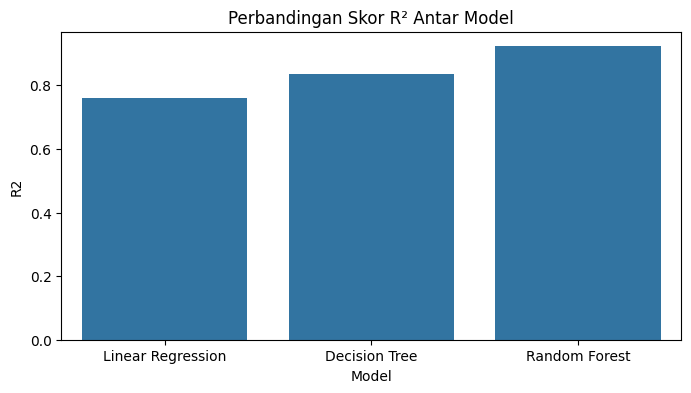

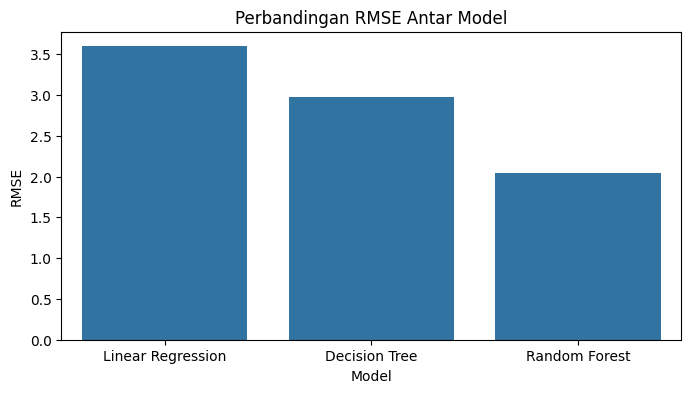

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='R2', data=results)
plt.title('Perbandingan Skor R² Antar Model')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Perbandingan RMSE Antar Model')
plt.show()

In [26]:
best_model = results.loc[results['R2'].idxmax()]
print(f"Model Terbaik: {best_model['Model']}")
print(f"R² = {best_model['R2']:.4f}, RMSE = {best_model['RMSE']:.4f}")

Model Terbaik: Random Forest
R² = 0.9225, RMSE = 2.0416


**Hasil Evaluasi Model:**

| Model              | RMSE   | R²      |
|--------------------|--------|---------|
| Linear Regression  | 3.595  | 0.7596  |
| Decision Tree      | 2.972  | 0.8357  |
| Random Forest      | **2.042** | **0.9225** |

Model **Random Forest** menunjukkan performa terbaik dengan nilai **R² = 0.9225** dan **RMSE = 2.04**, menandakan kemampuan prediksi yang sangat baik.

## **6. Kesimpulan**

Dari hasil eksperimen dapat disimpulkan bahwa:

- Fitur seperti `horsepower`, `weight`, dan `displacement` memiliki pengaruh besar terhadap nilai `mpg`.  
- Model Random Forest Regressor memberikan hasil paling akurat dan stabil dalam memprediksi efisiensi bahan bakar kendaraan.  
- Tahapan pre-processing dan feature encoding memiliki peran penting dalam meningkatkan performa model.  

Model regresi berbasis ensemble seperti Random Forest direkomendasikan untuk kasus serupa yang melibatkan hubungan non-linier antar fitur numerik.